In [52]:
# multimodal function
import numpy as np
from numpy import sin
from numpy import arange
from matplotlib import pyplot as plt
from myskopt import gp_minimize 
from numpy.random import standard_normal as _randn
import warnings
warnings.filterwarnings("ignore")
bounds = [(0., 10.), ]
np.random.seed(1)

In [53]:
def f(x): #x_optima = 7.9787
		return sin(x) + sin((10.0 / 3.0) * x)
def fn(x): #x_optima = 7.9787
	s = np.size(x)
	if s==1:
		x = np.array(x)
		return float(sin(x) + sin((10.0 / 3.0) * x)+ 0 * 0.5 * _randn(np.shape(x)))
	else:
		return sin(x) + sin((10.0 / 3.0) * x) + 0 * 0.5 * _randn(np.shape(x))

In [54]:
results = gp_minimize(fn,bounds,n_initial_points=2,initial_point_generator='lhs',acq_func="EI",n_calls=25,random_state=1)

X_test = np.linspace(0, 10, 10000).reshape(-1, 1)
gpr = results.models[-1]
gpr.fit(results.x_iters, results.func_vals)
mu, cov = gpr.predict(X_test, return_cov=True)
y_test = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

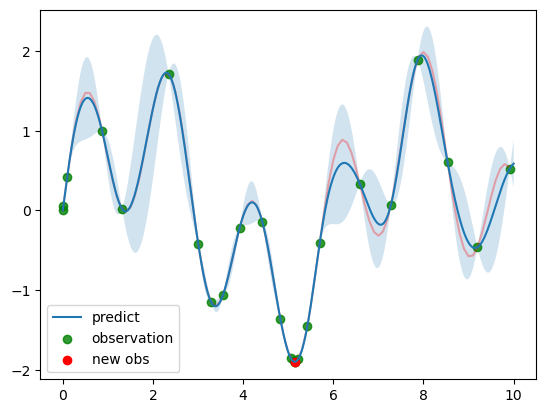

In [55]:
r_min, r_max = 0.0, 10.0
inputs = arange(r_min, r_max, 0.1)
plt.figure()
plt.plot(inputs, f(inputs),c="red",alpha=0.3)
plt.fill_between(X_test.ravel(), y_test + uncertainty, y_test - uncertainty, alpha=0.2)
plt.plot(X_test, y_test, label="predict")
plt.scatter(results.x_iters, results.func_vals, label="observation", c="green",alpha=0.8)
plt.scatter(results.x_iters[-1], results.func_vals[-1], label="new obs", c="red")
plt.legend()

In [ ]:
np.std(f(inputs))

In [ ]:
results.x_iters[0:5]